# Visualize test functions with square / hexagonal image data storage

In [1]:
################################################################################
# Imports
################################################################################

import math
import os
import sys

import matplotlib.pyplot as plt
from   matplotlib.collections import PatchCollection
from   matplotlib.patches     import RegularPolygon

import numpy as np

from time import time

sys.path[0] = '..'
from geometric_primitives import plot_function, plot_function_hexagonal, plot_function_square

In [2]:
################################################################################
# Parameters
################################################################################

output_dir = 'geometric_primitives_test'

In [3]:
################################################################################
# Visualize array as raster and vector graphics
################################################################################

def visualize_array(array, title, colormap=None, visualize_axes=True, show_array=False, rad_o=0.71):
	axes_border_width = 0.05


	# Construct array

	array_width  = array.shape[1]
	array_height = array.shape[0]

	array_x = [w for h in range(array_height) for w in range(array_width)]
	array_y = [h for h in range(array_height) for w in range(array_width)]

	array_x = [rad_o**2 + x for x in array_x]
	array_y = [rad_o**2 + y for y in array_y]

	if colormap is not None:
		array = plt.cm.get_cmap(colormap)(array)

	array_colors = np.reshape(array, newshape = (array.shape[0] * array.shape[1], array.shape[2]))


	# Set Matplotlib window title

	fig = plt.figure()
	man = plt.get_current_fig_manager()
	man.set_window_title(os.path.basename(title))


	# Adjust axes

	ax = plt.subplot(aspect='equal')

	ax.axis(
		(min(array_x) - 1,
		 max(array_x) + 1,
		 min(array_y) - 1,
		 max(array_y) + 1)
	)

	ax.invert_yaxis()


	# Calculate squares

	orientation = math.radians(45)

	patches_list = [RegularPolygon((x, y), numVertices=4, radius=rad_o, color=c, linewidth=0.1, orientation=orientation) for x, y, c in zip(array_x, array_y, array_colors) if not np.any(c)]


	# Visualize squares

	patch_collection = PatchCollection(patches_list, match_original=True)
	patch_collection = ax.add_collection(patch_collection)
	ax.axis('off')

	array_fig = f'{title}_sq'
	plt.savefig(f'{array_fig}.png', bbox_inches='tight')
	plt.savefig(f'{array_fig}.pdf', bbox_inches='tight')

	if show_array and not visualize_axes:
		plt.show()


	# Visualize squares with axes

	if visualize_axes:
		patch_collection.remove()


		axes_border_width_x = axes_border_width * max(array_x)
		axes_border_width_y = axes_border_width * max(array_y)

		ax.axis(
			(min(array_x) - axes_border_width_x,
			 max(array_x) + axes_border_width_x,
			 min(array_y) - axes_border_width_y,
			 max(array_y) + axes_border_width_y)
		)

		ax.invert_yaxis()


		patch_collection = PatchCollection(patches_list, match_original=True, edgecolor='black')
		ax.add_collection(patch_collection)
		ax.axis('on')

		array_fig = f'{array_fig}_with_axes'
		plt.savefig(f'{array_fig}.png', bbox_inches='tight')
		plt.savefig(f'{array_fig}.pdf', bbox_inches='tight')

		if show_array:
			plt.show()


	# Close

	plt.close()

In [4]:
################################################################################
# Visualize Hexarray as raster and vector graphics
################################################################################

def visualize_hexarray(hexarray, title, colormap=None, visualize_axes=True, show_hexarray=False, rad_o=0.63, figure_size=60):
	axes_border_width = 0.05


	# Construct Hexarray

	hexarray_width  = hexarray.shape[1]
	hexarray_height = hexarray.shape[0]

	hexarray_x = [w * math.sqrt(3) if not h % 2 else math.sqrt(3) / 2 + w * math.sqrt(3) for h in range(hexarray_height) for w in range(hexarray_width)]
	hexarray_y = [1.5 * h for h in range(hexarray_height) for w in range(hexarray_width)]

	hexarray_x = [(figure_size - rad_o * max(hexarray_x)) / 2 + rad_o * x for x in hexarray_x]
	hexarray_y = [(figure_size - rad_o * max(hexarray_y)) / 2 + rad_o * y for y in hexarray_y]

	if colormap is not None:
		hexarray = plt.cm.get_cmap(colormap)(hexarray)

	hexarray_colors = np.reshape(hexarray, newshape = (hexarray.shape[0] * hexarray.shape[1], hexarray.shape[2]))


	# Set Matplotlib window title

	fig = plt.figure()
	man = plt.get_current_fig_manager()
	man.set_window_title(os.path.basename(title))


	# Adjust axes

	ax = plt.subplot(aspect='equal')

	ax.axis(
		(min(hexarray_x) - 1,
		 max(hexarray_x) + 1,
		 min(hexarray_y) - 1,
		 max(hexarray_y) + 1)
	)

	ax.invert_yaxis()


	# Calculate hexagons

	patches_list = [RegularPolygon((x, y), numVertices=6, radius=rad_o, color=c, linewidth=0.1) for x, y, c in zip(hexarray_x, hexarray_y, hexarray_colors) if not np.any(c)]


	# Visualize hexagons

	patch_collection = PatchCollection(patches_list, match_original=True)
	patch_collection = ax.add_collection(patch_collection)
	ax.axis('off')

	hexarray_fig = f'{title}_hex'
	plt.savefig(f'{hexarray_fig}.png', bbox_inches='tight')
	plt.savefig(f'{hexarray_fig}.pdf', bbox_inches='tight')

	if show_hexarray and not visualize_axes:
		plt.show()


	# Visualize hexagons with axes

	if visualize_axes:
		patch_collection.remove()


		axes_border_width_x = axes_border_width * max(hexarray_x)
		axes_border_width_y = axes_border_width * max(hexarray_y)

		ax.axis(
			(min(hexarray_x) - axes_border_width_x,
			 max(hexarray_x) + axes_border_width_x,
			 min(hexarray_y) - axes_border_width_y,
			 max(hexarray_y) + axes_border_width_y)
		)

		ax.invert_yaxis()


		patch_collection = PatchCollection(patches_list, match_original=True, edgecolor='black')
		ax.add_collection(patch_collection)
		ax.axis('on')

		hexarray_fig = f'{hexarray_fig}_with_axes'
		plt.savefig(f'{hexarray_fig}.png', bbox_inches='tight')
		plt.savefig(f'{hexarray_fig}.pdf', bbox_inches='tight')

		if show_hexarray:
			plt.show()


	# Close

	plt.close()

In [5]:
################################################################################
# Visualize function with square / hexagonal image data storage
################################################################################

def plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_hexagonal,
	function_s             = ['x^2'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.01,
	rotation_degrees       =  0,
	interpolation          = 'nearest neighbor',
	output_dir             = output_dir,
	filename               = None,
	# Function visualize_hexarray()
	colormap       = 'gray',
	visualize_axes = True,
	show_array     = True):

	start_time = time()

	image, pixels_in_bound_cnt, filename = plot_function(
		plot_function_function = plot_function_function,
		function_s             = function_s,
		symbol_s               = symbol_s,
		figure_size            = figure_size,
		window_size            = window_size,
		step_size              = step_size,
		linewidth_factor       = linewidth_factor,
		rotation_degrees       = rotation_degrees,
		interpolation          = interpolation,
		output_dir             = output_dir,
		filename               = None)

	time_diff = time() - start_time

	print(f'Generated image in {time_diff:.3f} seconds: {function_s}')

	if plot_function_function is plot_function_square:
		visualize_array(
			array          = image,
			title          = os.path.join(output_dir, f'{filename}_visualize_array'),
			colormap       = colormap,
			visualize_axes = visualize_axes,
			show_array     = show_array)
	else: # plot_function_hexagonal
		visualize_hexarray(
			hexarray       = image,
			title          = os.path.join(output_dir, f'{filename}_visualize_hexarray'),
			colormap       = colormap,
			visualize_axes = visualize_axes,
			show_hexarray  = show_array,
			figure_size    = figure_size)

In [6]:
################################################################################
# Initialization
################################################################################

os.makedirs(output_dir, exist_ok=True)

Generated image in 0.143 seconds: ['x']


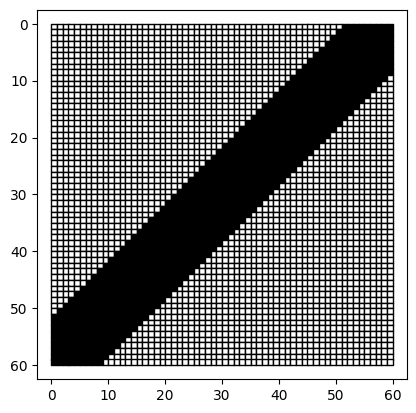

Generated image in 0.114 seconds: ['x']


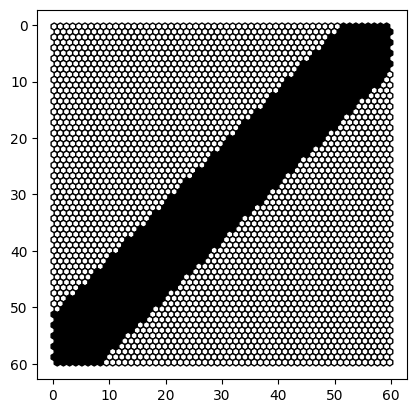

Generated image in 0.444 seconds: ['sqrt(x)']


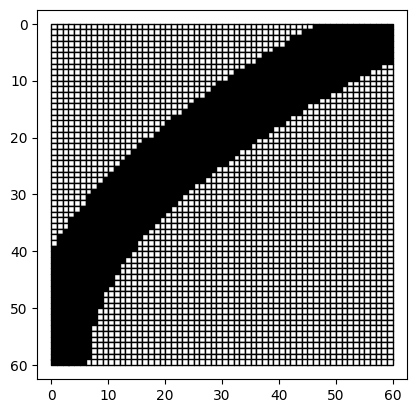

Generated image in 0.235 seconds: ['sqrt(x)']


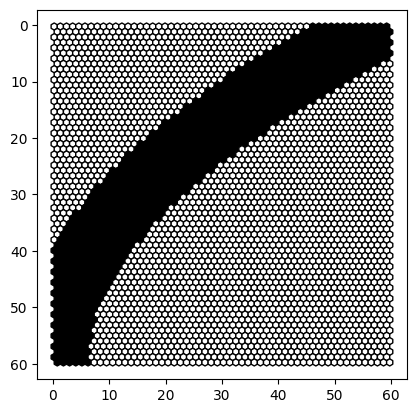

Generated image in 3.074 seconds: ['1/4*(2-sqrt(-3+16*x-16*x^2))', '1/4*(2+sqrt(-3+16*x-16*x^2))']


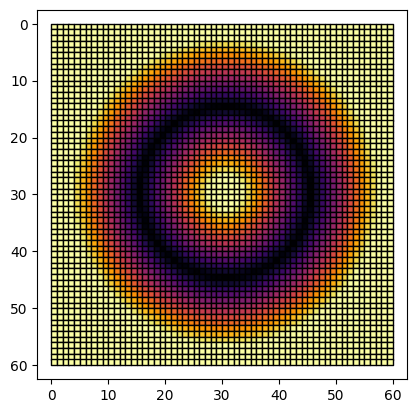

Generated image in 1.212 seconds: ['1/4*(2-sqrt(-3+16*x-16*x^2))', '1/4*(2+sqrt(-3+16*x-16*x^2))']


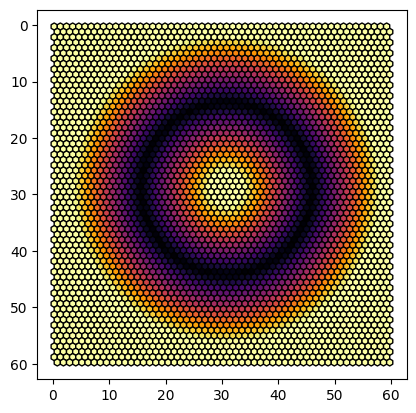

Generated image in 6.850 seconds: ['0.5*sin(20*x)+0.5']


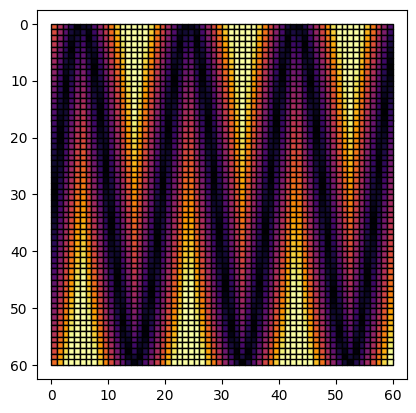

Generated image in 4.290 seconds: ['0.5*sin(20*x)+0.5']


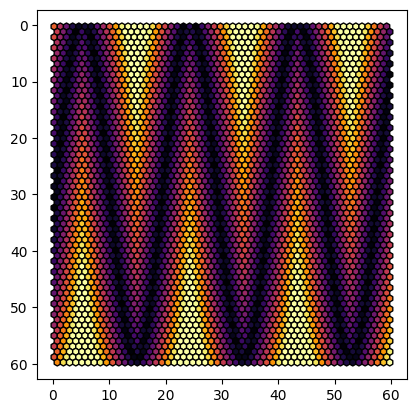

Generated image in 33.501 seconds: ['x+y']


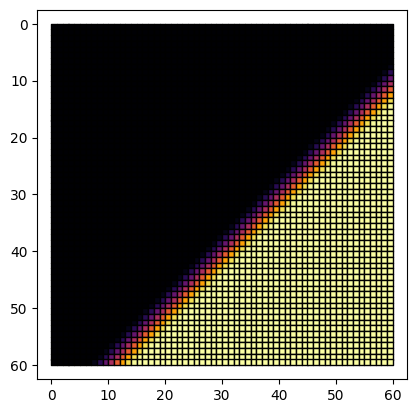

Generated image in 37.169 seconds: ['x+y']


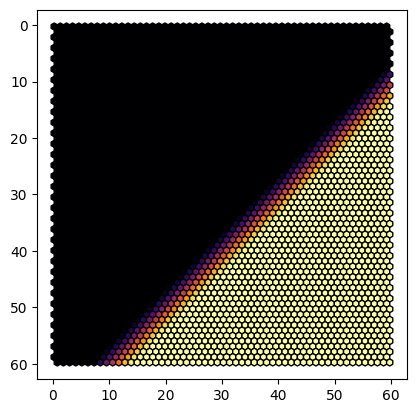

In [7]:
################################################################################
# Visualize test functions with square / hexagonal image data storage
################################################################################


# Example "line": nearest neighbor interpolation with colormap "gray"

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_square,
	function_s             = ['x'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'nearest neighbor',
	output_dir             = output_dir,
	# Function visualize_array()
	colormap       = 'gray',
	visualize_axes = True,
	show_array     = True)

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_hexagonal,
	function_s             = ['x'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'nearest neighbor',
	output_dir             = output_dir,
	# Function visualize_hexarray()
	colormap       = 'gray',
	visualize_axes = True,
	show_array     = True)


# Example "curve": nearest neighbor interpolation with colormap "gray"

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_square,
	function_s             = ['sqrt(x)'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'nearest neighbor',
	output_dir             = output_dir,
	# Function visualize_array()
	colormap       = 'gray',
	visualize_axes = True,
	show_array     = True)

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_hexagonal,
	function_s             = ['sqrt(x)'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'nearest neighbor',
	output_dir             = output_dir,
	# Function visualize_hexarray()
	colormap       = 'gray',
	visualize_axes = True,
	show_array     = True)


# Example "circle": linear interpolation with colormap "inferno"

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_square,
	function_s             = ['1/4*(2-sqrt(-3+16*x-16*x^2))', '1/4*(2+sqrt(-3+16*x-16*x^2))'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.2,
	rotation_degrees       =  0,
	interpolation          = 'linear',
	output_dir             = output_dir,
	# Function visualize_array()
	colormap       = 'inferno',
	visualize_axes = True,
	show_array     = True)

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_hexagonal,
	function_s             = ['1/4*(2-sqrt(-3+16*x-16*x^2))', '1/4*(2+sqrt(-3+16*x-16*x^2))'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.2,
	rotation_degrees       =  0,
	interpolation          = 'linear',
	output_dir             = output_dir,
	# Function visualize_hexarray()
	colormap       = 'inferno',
	visualize_axes = True,
	show_array     = True)


# Example "sine": linear interpolation with colormap "inferno"

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_square,
	function_s             = ['0.5*sin(20*x)+0.5'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'linear',
	output_dir             = output_dir,
	# Function visualize_array()
	colormap       = 'inferno',
	visualize_axes = True,
	show_array     = True)

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_hexagonal,
	function_s             = ['0.5*sin(20*x)+0.5'],
	symbol_s               = ['x'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'linear',
	output_dir             = output_dir,
	# Function visualize_hexarray()
	colormap       = 'inferno',
	visualize_axes = True,
	show_array     = True)


# Example "multiple symbols": cubic interpolation with colormap "inferno"

# This example demonstrates the use of multiple symbols: function "['x+y']" with symbols "['x', 'y']".

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_square,
	function_s             = ['x+y'],
	symbol_s               = ['x', 'y'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'cubic',
	output_dir             = output_dir,
	# Function visualize_array()
	colormap       = 'inferno',
	visualize_axes = True,
	show_array     = True)

plot_function_and_visualize(
	# Function plot_function()
	plot_function_function = plot_function_hexagonal,
	function_s             = ['x+y'],
	symbol_s               = ['x', 'y'],
	figure_size            = 60,
	window_size            =  1,
	step_size              =  0.005,
	linewidth_factor       =  0.1,
	rotation_degrees       =  0,
	interpolation          = 'cubic',
	output_dir             = output_dir,
	# Function visualize_hexarray()
	colormap       = 'inferno',
	visualize_axes = True,
	show_array     = True)